In [1]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

totalworkingyears: Comprobar si el nulo en años de experiencia laboral es dispar con la columna numcompaniesworked.

In [2]:
df = pd.read_csv('raw_data.csv', index_col=0)

In [3]:
df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,over18,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,numberchildren,remotework
0,51,No,NaN,2015.722222,NaN,6,3,NaN,1,1,1,0,NaN,3,5,resEArch DIREcToR,3,NaN,"16280,83$","42330,17$",7,Y,No,13,"3,0",3,Full Time,0,NaN,5,"3,0",20,NaN,15,15,"16280,83$",1972,"195370,00$",NaN,NaN,Yes
1,52,No,NaN,2063.388889,NaN,1,4,Life Sciences,1,2,3,0,NaN,2,5,ManAGeR,3,NaN,NaN,"43331,17$",0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,NaN,1971,"199990,00$",NaN,NaN,1
2,42,No,travel_rarely,1984.253968,Research & Development,4,2,Technical Degree,1,3,3,0,NaN,3,5,ManaGER,4,Married,NaN,"41669,33$",1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,NaN,1981,"192320,00$",ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,1771.404762,NaN,2,4,Medical,1,4,1,1,NaN,3,4,ReseArCH DIrECtOr,3,Married,"14307,50$","37199,50$",3,Y,NaN,19,"3,0",2,Full Time,2,NaN,2,NaN,20,NaN,5,6,"14307,50$",1976,"171690,00$",NaN,NaN,False
4,46,No,NaN,1582.771346,NaN,3,3,Technical Degree,1,5,1,1,NaN,4,4,sAleS EXECUtIve,1,Divorced,"12783,92$","33238,20$",2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,"12783,92$",1977,NaN,NaN,NaN,0


In [4]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [5]:
# 'totalworkingyears', 'numcompaniesworked'

df.isnull().sum() / df.shape[0] * 100

age                           0.000000
attrition                     0.000000
businesstravel               47.735399
dailyrate                     0.000000
department                   81.406436
distancefromhome              0.000000
education                     0.000000
educationfield               46.126341
employeecount                 0.000000
employeenumber                0.000000
environmentsatisfaction       0.000000
gender                        0.000000
hourlyrate                   75.506555
jobinvolvement                0.000000
joblevel                      0.000000
jobrole                       0.000000
jobsatisfaction               0.000000
maritalstatus                40.226460
monthlyincome                29.141836
monthlyrate                   0.000000
numcompaniesworked            0.000000
over18                       55.899881
overtime                     41.477950
percentsalaryhike             0.000000
performancerating            11.918951
relationshipsatisfaction 

In [6]:
# totalworkingyears: 33% de nulos (549 valores)
# numcompaniesworked: 0% de nulos 

In [7]:
df.isnull().sum() 

age                            0
attrition                      0
businesstravel               801
dailyrate                      0
department                  1366
distancefromhome               0
education                      0
educationfield               774
employeecount                  0
employeenumber                 0
environmentsatisfaction        0
gender                         0
hourlyrate                  1267
jobinvolvement                 0
joblevel                       0
jobrole                        0
jobsatisfaction                0
maritalstatus                675
monthlyincome                489
monthlyrate                    0
numcompaniesworked             0
over18                       938
overtime                     696
percentsalaryhike              0
performancerating            200
relationshipsatisfaction       0
standardhours                351
stockoptionlevel               0
totalworkingyears            549
trainingtimeslastyear          0
worklifeba

In [8]:
# totalworkingyears: 33% de nulos (549 valores)
# numcompaniesworked: 0% de nulos

### totalworkingyears
(dtype: object)      
*Años totales de experiencia laboral*

       Valores = array([nan, '34,0', '22,0', '28,0', '20,0', '21,0', '33,0', '40,0',
       '18,0', '25,0', '15,0', '17,0', '26,0', '16,0', '24,0', '14,0',
       '23,0', '27,0', '19,0', '11,0', '38,0', '37,0', '13,0', '12,0',
       '29,0', '10,0', '36,0', '35,0', '9,0', '31,0', '32,0', '8,0',
       '7,0', '30,0', '6,0', '5,0', '4,0', '3,0', '2,0', '1,0', '0,0'],
      dtype=object)

Propuesta de mejora: 
- Reemplazar ``,`` por ``.``       
``df["totalworkingyears"] = df["totalworkingyears"].str.replace(',', '.')``
- Posibilidad de cambiar a 0 Gestión de nulos:   
``df["totalworkingyears"] = df["totalworkingyears"].fillna(0)``
- Convertir a float:        
``df["totalworkingyears"] = df["totalworkingyears"].astype(float)``

                     
       Resultado: array([ 0, 34, 22, 28, 20, 21, 33, 40, 18, 25, 15, 17, 26, 16, 24, 14, 23, 27, 19, 11, 38, 37, 13, 12, 29, 10, 36, 35,  9, 31, 32,  8,  7, 30, 6,  5,  4,  3,  2,  1])

- Comprobar si el nulo en años de experiencia laboral es dispar con la columna [numcompaniesworked](#numcompaniesworked).

In [9]:
df['totalworkingyears'].unique()

array([nan, '34,0', '22,0', '28,0', '20,0', '21,0', '33,0', '40,0',
       '18,0', '25,0', '15,0', '17,0', '26,0', '16,0', '24,0', '14,0',
       '23,0', '27,0', '19,0', '11,0', '38,0', '37,0', '13,0', '12,0',
       '29,0', '10,0', '36,0', '35,0', '9,0', '31,0', '32,0', '8,0',
       '7,0', '30,0', '6,0', '5,0', '4,0', '3,0', '2,0', '1,0', '0,0'],
      dtype=object)

### numcompaniesworked
(dtype: int64)       
*Número de empresas previas en las que ha trabajado*

       Valores = array([7, 0, 1, 3, 2, 4, 8, 9, 5, 6])

       Values 1678 | Unique 10 (0-9) | NaN 0 | dtype int

Propuesta de mejora:
- Entiendo que son la cantidad de empresas donde el trabajador ha trabajado. cv - empleos en companias anteriores.
- ¿Igual podemos llamarlo experiencia en diferentes empresas? ¿Score empleos previos?

In [10]:
df['numcompaniesworked'].unique()

array([7, 0, 1, 3, 2, 4, 8, 9, 5, 6])

<Axes: xlabel='totalworkingyears', ylabel='numcompaniesworked'>

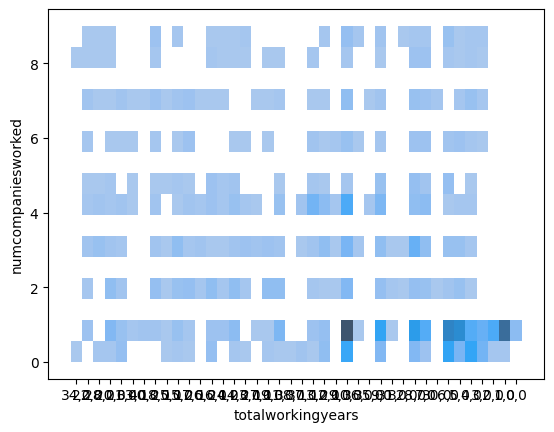

In [11]:
sns.histplot(data=df, x='totalworkingyears', y='numcompaniesworked', kde=True)

In [12]:
df.groupby('totalworkingyears')['numcompaniesworked'].mean().reset_index()

,totalworkingyears,numcompaniesworked
0,"0,0",1.000000
1,"1,0",0.963636
2,"10,0",2.370861
3,"11,0",2.612903
4,"12,0",2.852941
5,"13,0",3.870968
6,"14,0",2.870968
7,"15,0",3.392857
8,"16,0",2.966667
9,"17,0",3.869565


In [13]:
display(df[['totalworkingyears', 'numcompaniesworked']])


,totalworkingyears,numcompaniesworked
0,NaN,7
1,"34,0",0
2,"22,0",1
3,NaN,3
4,NaN,2
...,...,...
1673,NaN,4
1674,"27,0",3
1675,"6,0",1
1676,NaN,8


In [14]:
df.dtypes

age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel            

In [17]:
#Teniendo en cuenta esta tabla, los valores nulos son desconocidos y no siguen ningun patro

In [15]:
#reemplazando , por . en la columna de totalworkingyears

df["totalworkingyears"] = df["totalworkingyears"].str.replace(',', '.')

In [16]:
df.dtypes

age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel            

In [17]:
display(df[['totalworkingyears', 'numcompaniesworked']])

,totalworkingyears,numcompaniesworked
0,NaN,7
1,34.0,0
2,22.0,1
3,NaN,3
4,NaN,2
...,...,...
1673,NaN,4
1674,27.0,3
1675,6.0,1
1676,NaN,8


In [18]:
df[['totalworkingyears', 'numcompaniesworked']].sample(20)

,totalworkingyears,numcompaniesworked
1602,8.0,1
1206,13.0,5
1240,10.0,2
5,NaN,3
332,NaN,1
158,16.0,0
120,NaN,1
211,NaN,1
627,8.0,6
828,NaN,2


In [ ]:
#convirtiendo los números a enteros manteniendo los valores nulos
# # primero, hay que pasar el tipo de columna de objeto a float 

def convertir_a_entero(valor):
    try:
        return int(float(valor)) if pd.notna(valor) else np.nan
    except (ValueError, TypeError):
        return np.nan

# Aplicar solo a la columna 'totalworkingyears'
df['totalworkingyears'] = df['totalworkingyears'].apply(convertir_a_entero)

print(df)

     age attrition businesstravel    dailyrate                department  \
0     51        No            NaN  2015.722222                       NaN   
1     52        No            NaN  2063.388889                       NaN   
2     42        No  travel_rarely  1984.253968   Research & Development    
3     47        No  travel_rarely  1771.404762                       NaN   
4     46        No            NaN  1582.771346                       NaN   
...   ..       ...            ...          ...                       ...   
1673  43        No            NaN   488.944444                       NaN   
1674  47        No            NaN  1973.984127                       NaN   
1675  29        No  travel_rarely   290.035510                       NaN   
1676  47        No  travel_rarely  1032.487286                       NaN   
1677  32        No            NaN   556.256661                       NaN   

      distancefromhome  education    educationfield  employeecount  \
0                

In [20]:
df.dtypes

age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel            

In [ ]:
#ahora, de float a int para que podamos quitar el '.0' de los valores, manteniendo los nulos

df['totalworkingyears'] = df['totalworkingyears'].apply(lambda x: int(x) if not pd.isna(x) else np.nan)

df[['totalworkingyears', 'numcompaniesworked']].sample(20)

,totalworkingyears,numcompaniesworked
1297,1.0,1
354,24.0,1
366,NaN,1
1448,NaN,1
794,4.0,1
930,10.0,8
795,10.0,4
582,NaN,0
1401,1.0,1
437,10.0,1


In [22]:
df['totalworkingyears'] = df['totalworkingyears'].astype('Int64')


In [23]:
df.dtypes

age                          object
attrition                    object
businesstravel               object
dailyrate                   float64
department                   object
distancefromhome              int64
education                     int64
educationfield               object
employeecount                 int64
employeenumber                int64
environmentsatisfaction       int64
gender                        int64
hourlyrate                  float64
jobinvolvement                int64
joblevel                      int64
jobrole                      object
jobsatisfaction               int64
maritalstatus                object
monthlyincome                object
monthlyrate                  object
numcompaniesworked            int64
over18                       object
overtime                     object
percentsalaryhike             int64
performancerating            object
relationshipsatisfaction      int64
standardhours                object
stockoptionlevel            

In [33]:
df[['totalworkingyears', 'numcompaniesworked']].sample(20)

,totalworkingyears,numcompaniesworked
1455,1,1
1347,6,0
907,<NA>,0
1361,1,1
1619,<NA>,1
338,10,1
1061,5,3
772,7,4
351,11,4
240,<NA>,0


In [34]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth', 'salary',
       'roledepartament', 'numberchildren', 'remotework'],
      dtype='object')

In [39]:
# tras haber comprobado los datos nulos con otras columnas, es mas claro que los nulos son informacion importante que no tenemos

df[['totalworkingyears', 'numcompaniesworked', 'yearsatcompany', 'age', 'joblevel', 'jobrole']].sample(20)

,totalworkingyears,numcompaniesworked,yearsatcompany,age,joblevel,jobrole
1193,3,1,3,29,1,sALES REprEsEntATive
215,9,1,9,45,2,LaBoraTORy TeChNiCIAN
1060,6,1,5,44,1,rEsEarCH SCIeNtist
533,9,1,9,37,3,sALES ExEcUTiVE
956,35,7,5,53,3,sALes ExEcUtiVE
758,<NA>,3,4,37,2,MaNufAcTurInG DIReCtor
1626,28,3,8,50,5,reseaRCH DIrectOr
1133,3,1,3,28,1,huMan RESOuRCEs
1259,1,0,0,19,1,SALES RepRESENTatIvE
1425,18,2,1,40,2,maNuFaCturInG dirECTOR


### Análisis:
No es recomendable rellenar los valores NaN con 0, ya que esto introduciría información incierta y no verificable. Los datos faltantes son aleatorios y no siguen un patrón claro, por lo que usar la media o la mediana podría sesgar el análisis.

### Propuesta:
Dado que los valores nulos representan información faltante que no puede inferirse con certeza, lo más adecuado es mantenerlos como NaN.